## Data Cleaning (By District)

Data cleaning notebook for districtwise dataset

In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.getcwd()

'/home/rc/capstone/notebooks/data-cleaning'

In [ ]:
# Checking env/venv dependencies
%pip install seaborn
import seaborn as sns; print("seaborn", sns.__version__)

In [2]:
os.chdir('../../data')
!ls

Key_Indicator_State_and_District_wise_data  Key_indicator_statewise.csv
Key_Indicators_Statewise.sqlite		    healthanalytics.zip
Key_indicator_districtwise.csv		    statewise.sqlite


In [3]:
# Load statewise dataset
df = pd.read_csv('Key_indicator_districtwise.csv')

# Remove all letter prefixes eg AA_ - ZZ_ from feature columns
df.columns = [re.sub(r'^[A-Z]{2}_', '', col) for col in df.columns]

# Check all features in resulting dataframe
df.head(10) # 284 districts surveyed

State_Name State_District_Name  Sample_Units_Total  Sample_Units_Rural  \
0      Assam             Barpeta                  53                  47   
1      Assam          Bongaigaon                  89                  73   
2      Assam              Cachar                 105                  84   
3      Assam             Darrang                  26                  24   
4      Assam             Dhemaji                 121                 108   
5      Assam              Dhubri                  42                  35   
6      Assam           Dibrugarh                  91                  66   
7      Assam            Goalpara                  64                  56   
8      Assam            Golaghat                  70                  61   
9      Assam          Hailakandi                  10                   8   

   Sample_Units_Urban  Households_Total  Households_Rural  Households_Urban  \
0                   6             13711             12765               946   
1                  16             17384             14904              2480   
2                  21             27488             24207              3281   
3                   2              5951              5769               182   
4                  13             14481             12619              1862   
5                   7             11001              9954              1047   
6                  25             21378             16514              4864   
7                   8             15891             14630              1261   
8                   9             16021             14183              1838   
9                   2              2802              2381               421   

   Population_Total  Population_Rural  ...  \
0             64606             60293  ...   
1             84012             73899  ...   
2            127158            112171  ...   
3             29048             28256  ...   
4             75451             66537  ...   
5             50992             46337  ...   
6             97268             76433  ...   
7             75890             70273  ...   
8             72165             64579  ...   
9             13892             11986  ...   

   Under_Five_Mortality_Rate_U5MR_Rural_Lower_Limit  \
0                                                54   
1                                                58   
2                                                68   
3                                                79   
4                                                40   
5                                                79   
6                                                62   
7                                                66   
8                                                67   
9                                                75   

   Under_Five_Mortality_Rate_U5MR_Rural_Upper_Limit  \
0                                                70   
1                                                73   
2                                                80   
3                                               107   
4                                                53   
5                                               100   
6                                                77   
7                                                81   
8                                                83   
9                                               109   

   Under_Five_Mortality_Rate_U5MR_Urban_Lower_Limit  \
0                                               NaN   
1                                               NaN   
2                                              31.0   
3                                               NaN   
4                                              11.0   
5                                               NaN   
6                                              37.0   
7                                               NaN   
8                                               NaN   
9                         

In [4]:
# List of all feature columns
print(df.columns.tolist())

['State_Name', 'State_District_Name', 'Sample_Units_Total', 'Sample_Units_Rural', 'Sample_Units_Urban', 'Households_Total', 'Households_Rural', 'Households_Urban', 'Population_Total', 'Population_Rural', 'Population_Urban', 'Ever_Married_Women_Aged_15_49_Years_Total', 'Ever_Married_Women_Aged_15_49_Years_Rural', 'Ever_Married_Women_Aged_15_49_Years_Urban', 'Currently_Married_Women_Aged_15_49_Years_Total', 'Currently_Married_Women_Aged_15_49_Years_Rural', 'Currently_Married_Women_Aged_15_49_Years_Urban', 'Children_12_23_Months_Total', 'Children_12_23_Months_Rural', 'Children_12_23_Months_Urban', 'Average_Household_Size_Sc_Total', 'Average_Household_Size_Sc_Rural', 'Average_Household_Size_Sc_Urban', 'Average_Household_Size_St_Total', 'Average_Household_Size_St_Rural', 'Average_Household_Size_St_Urban', 'Average_Household_Size_All_Total', 'Average_Household_Size_All_Rural', 'Average_Household_Size_All_Urban', 'Population_Below_Age_15_Years_Total', 'Population_Below_Age_15_Years_Rural', 'P

In [5]:
df.describe()

Sample_Units_Total  Sample_Units_Rural  Sample_Units_Urban  \
count          284.000000          284.000000          284.000000   
mean            72.862676           53.971831           18.890845   
std             49.310713           37.870795           24.083454   
min             10.000000            8.000000            2.000000   
25%             46.000000           34.000000            7.000000   
50%             60.000000           45.000000           12.000000   
75%             82.000000           61.000000           20.000000   
max            386.000000          337.000000          234.000000   

       Households_Total  Households_Rural  Households_Urban  Population_Total  \
count        284.000000        284.000000        284.000000        284.000000   
mean       15201.264085      12329.848592       2871.415493      74178.753521   
std         8360.819705       6621.757700       3900.137566      38613.108658   
min         2802.000000       2381.000000        153.000000      13892.000000   
25%         9971.500000       7997.750000        971.000000      49222.500000   
50%        13011.500000      10758.500000       1580.500000      65206.500000   
75%        17749.000000      15250.000000       3044.250000      88998.500000   
max        66535.000000      47183.000000      35763.000000     303009.000000   

       Population_Rural  Population_Urban  \
count        284.000000        284.000000   
mean       60517.820423      13660.933099   
std        31475.272720      17693.167257   
min        11722.000000        759.000000   
25%        40206.500000       4613.000000   
50%        53656.000000       7785.500000   
75%        73290.000000      14757.500000   
max       238744.000000     155980.000000   

       Ever_Married_Women_Aged_15_49_Years_Total  ...  \
count                                 284.000000  ...   
mean                                14012.871268  ...   
std                                  7395.232081  ...   
min                                  2501.000000  ...   
25%                                  9229.250000  ...   
50%                                 12368.500000  ...   
75%                                 16442.750000  ...   
max                                 56581.000000  ...   

       Under_Five_Mortality_Rate_U5MR_Rural_Lower_Limit  \
count                                        284.000000   
mean                                          71.366197   
std                                           19.116152   
min                                           21.000000   
25%                                           59.750000   
50%                                           70.000000   
75%                                           83.000000   
max                                          130.000000   

       Under_Five_Mortality_Rate_U5MR_Rural_Upper_Limit  \
count                                        284.000000   
mean                                          89.144366   
std                                           22.151828   
min                                           29.000000   
25%                                           75.000000   
50%                                           89.000000   
75%                                          103.000000   
max                                          162.000000   

       Under_Five_Mortality_Rate_U5MR_Urban_Lower_Limit  \
count                                        206.000000   
mean                                          35.558252   
std                                           16.359796   
min                                            0.000000   
25%                                           25.000000   
50%                                           34.000000   
75%                                           44.000000   
max                                           84.000000   

       Under_Five_Mortality_Rate_U5MR_Urban_Upper_Limit  \
count                                        206.000000   
mean                 

In [6]:
df.shape

(284, 644)

In [7]:
states = list(df.State_District_Name.unique())
print(len(states))
states

284


['Barpeta',
 'Bongaigaon',
 'Cachar',
 'Darrang',
 'Dhemaji',
 'Dhubri',
 'Dibrugarh',
 'Goalpara',
 'Golaghat',
 'Hailakandi',
 'Jorhat',
 'Kamrup',
 'Karbi Anglong',
 'Karimganj',
 'Kokrajhar',
 'Lakhimpur',
 'Marigaon',
 'Nagaon',
 'Nalbari',
 'North Cachar Hills',
 'Sibsagar',
 'Sonitpur',
 'Tinsukia',
 'Araria',
 'Aurangabad',
 'Banka',
 'Begusarai',
 'Bhagalpur',
 'Bhojpur',
 'Buxar',
 'Darbhanga',
 'Gaya',
 'Gopalganj',
 'Jamui',
 'Jehanabad',
 'Kaimur (Bhabua)',
 'Katihar',
 'Khagaria',
 'Kishanganj',
 'Lakhisarai',
 'Madhepura',
 'Madhubani',
 'Munger',
 'Muzaffarpur',
 'Nalanda',
 'Nawada',
 'Pashchim Champaran',
 'Patna',
 'Purba Champaran',
 'Purnia',
 'Rohtas',
 'Saharsa',
 'Samastipur',
 'Saran',
 'Sheikhpura',
 'Sheohar',
 'Sitamarhi',
 'Siwan',
 'Supaul',
 'Vaishali',
 'Bastar',
 'Bilaspur',
 'Dantewada',
 'Dhamtari',
 'Durg',
 'Janjgir-Champa',
 'Jashpur',
 'Kanker',
 'Kawardha',
 'Korba',
 'Koriya',
 'Mahasamund',
 'Raigarh',
 'Raipur',
 'Rajnandgaon',
 'Surguja',
 'B

In [8]:
# Check for null values
# --- Null count per feature (overall) ---
null_counts = df.isnull().sum()

print("Null counts per feature:")
print(null_counts[null_counts > 0].sum()) 

Null counts per feature:
9297


In [9]:
nulls_long = (
    df.drop(columns=["State_District_Name"])
      .isnull()
      .groupby(df["State_District_Name"])
      .sum()
      .reset_index()
      .melt(id_vars="State_District_Name", var_name="Feature", value_name="Null_Count")
)

print(nulls_long.head(20)) # First 20 of 640+ features

   State_District_Name     Feature  Null_Count
0                 Agra  State_Name           0
1                Ajmer  State_Name           0
2              Aligarh  State_Name           0
3            Allahabad  State_Name           0
4               Almora  State_Name           0
5                Alwar  State_Name           0
6       Ambedkar Nagar  State_Name           0
7               Anugul  State_Name           0
8               Araria  State_Name           0
9              Auraiya  State_Name           0
10          Aurangabad  State_Name           0
11            Azamgarh  State_Name           0
12           Bageshwar  State_Name           0
13             Baghpat  State_Name           0
14            Bahraich  State_Name           0
15            Balaghat  State_Name           0
16            Balangir  State_Name           0
17           Baleshwar  State_Name           0
18              Ballia  State_Name           0
19           Balrampur  State_Name           0


In [10]:
print(nulls_long.tail(20)) # Last 20 of 640+ features

       State_District_Name                               Feature  Null_Count
182592           Sonbhadra  Sex_Ratio_At_Birth_Urban_Upper_Limit           0
182593            Sonitpur  Sex_Ratio_At_Birth_Urban_Upper_Limit           0
182594           Sultanpur  Sex_Ratio_At_Birth_Urban_Upper_Limit           0
182595          Sundargarh  Sex_Ratio_At_Birth_Urban_Upper_Limit           0
182596              Supaul  Sex_Ratio_At_Birth_Urban_Upper_Limit           0
182597             Surguja  Sex_Ratio_At_Birth_Urban_Upper_Limit           0
182598       Tehri Garhwal  Sex_Ratio_At_Birth_Urban_Upper_Limit           0
182599           Tikamgarh  Sex_Ratio_At_Birth_Urban_Upper_Limit           0
182600            Tinsukia  Sex_Ratio_At_Birth_Urban_Upper_Limit           0
182601                Tonk  Sex_Ratio_At_Birth_Urban_Upper_Limit           0
182602             Udaipur  Sex_Ratio_At_Birth_Urban_Upper_Limit           0
182603   Udham Singh Nagar  Sex_Ratio_At_Birth_Urban_Upper_Limit           0

In [12]:
# Auto-populate list of all features
features_df = pd.DataFrame({"Feature": df.columns})
print(features_df.head(20))

                                           Feature
0                                       State_Name
1                              State_District_Name
2                               Sample_Units_Total
3                               Sample_Units_Rural
4                               Sample_Units_Urban
5                                 Households_Total
6                                 Households_Rural
7                                 Households_Urban
8                                 Population_Total
9                                 Population_Rural
10                                Population_Urban
11       Ever_Married_Women_Aged_15_49_Years_Total
12       Ever_Married_Women_Aged_15_49_Years_Rural
13       Ever_Married_Women_Aged_15_49_Years_Urban
14  Currently_Married_Women_Aged_15_49_Years_Total
15  Currently_Married_Women_Aged_15_49_Years_Rural
16  Currently_Married_Women_Aged_15_49_Years_Urban
17                     Children_12_23_Months_Total
18                     Children

In [17]:
 ## Range of the target variable
print(df.Infant_Mortality_Rate_Imr_Total_Person.min())
print(df.Infant_Mortality_Rate_Imr_Total_Person.max())

19.22
97.0


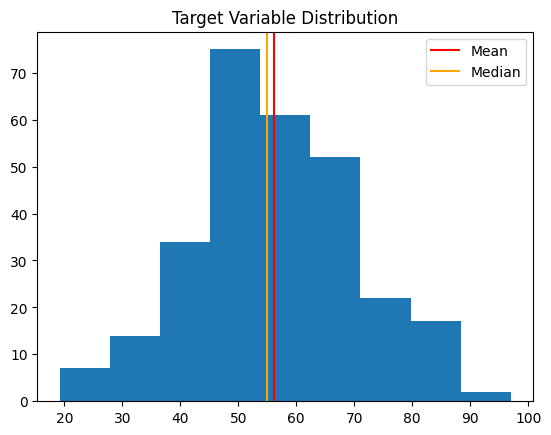

In [18]:
## Target Variable Distribution
plt.hist(df.Infant_Mortality_Rate_Imr_Total_Person, bins=9)
plt.axvline(df.Infant_Mortality_Rate_Imr_Total_Person.mean(), color='red', label='Mean')
plt.axvline(df.Infant_Mortality_Rate_Imr_Total_Person.median(), color='orange', label = 'Median')
plt.title('Target Variable Distribution'), plt.legend()
plt.show()

In [13]:
## Correlation overview
df.select_dtypes(include='number').corr()

Sample_Units_Total  Sample_Units_Rural  \
Sample_Units_Total                              1.000000            0.879744   
Sample_Units_Rural                              0.879744            1.000000   
Sample_Units_Urban                              0.664112            0.228788   
Households_Total                                0.915218            0.784546   
Households_Rural                                0.794245            0.879880   
...                                                  ...                 ...   
Sex_Ratio_At_Birth_Total_Upper_Limit           -0.233965           -0.161355   
Sex_Ratio_At_Birth_Rural_Lower_Limit            0.040244            0.115704   
Sex_Ratio_At_Birth_Rural_Upper_Limit           -0.211274           -0.178947   
Sex_Ratio_At_Birth_Urban_Lower_Limit            0.228764            0.078635   
Sex_Ratio_At_Birth_Urban_Upper_Limit           -0.252206           -0.087441   

                                      Sample_Units_Urban  Households_Total  \
Sample_Units_Total                              0.664112          0.915218   
Sample_Units_Rural                              0.228788          0.784546   
Sample_Units_Urban                              1.000000          0.640218   
Households_Total                                0.640218          1.000000   
Households_Rural                                0.242616          0.889939   
...                                                  ...               ...   
Sex_Ratio_At_Birth_Total_Upper_Limit           -0.225313         -0.221557   
Sex_Ratio_At_Birth_Rural_Lower_Limit           -0.099542          0.141646   
Sex_Ratio_At_Birth_Rural_Upper_Limit           -0.151190         -0.208497   
Sex_Ratio_At_Birth_Urban_Lower_Limit            0.340372          0.270664   
Sex_Ratio_At_Birth_Urban_Upper_Limit           -0.374116         -0.200014   

                                      Households_Rural  Households_Urban  \
Sample_Units_Total                            0.794245          0.613484   
Sample_Units_Rural                            0.879880          0.187966   
Sample_Units_Urban                            0.242616          0.960531   
Households_Total                              0.889939          0.632763   
Households_Rural                              1.000000          0.209956   
...                                                ...               ...   
Sex_Ratio_At_Birth_Total_Upper_Limit         -0.156330         -0.209536   
Sex_Ratio_At_Birth_Rural_Lower_Limit          0.237102         -0.098910   
Sex_Ratio_At_Birth_Rural_Upper_Limit         -0.188050         -0.127684   
Sex_Ratio_At_Birth_Urban_Lower_Limit          0.131485          0.354504   
Sex_Ratio_At_Birth_Urban_Upper_Limit         -0.025769         -0.379968   

                                      Population_Total  Population_Rural  \
Sample_Units_Total                            0.872806          0.737195   
Sample_Units_Rural                            0.741014          0.818504   
Sample_Units_Urban                            0.621832          0.222319   
Households_Total                              0.975385          0.853393   
Households_Rural                              0.877945          0.972468   
...                                                ...               ...   
Sex_Ratio_At_Birth_Total_Upper_Limit         -0.218823         -0.144190   
Sex_Ratio_At_Birth_Rural_Lower_Limit          0.186992          0.286058   
Sex_Ratio_At_Birth_Rural_Upper_Limit         -0.203252         -0.174845   
Sex_Ratio_At_Birth_Urban_Lower_Limit          0.274554          0.131205   
Sex_Ratio_At_Birth_Urban_Upper_Limit         -0.200846         -0.020800   

                                      Population_Urban  \
Sample_Units_Total                            0.593355   
Sample_Units_Rural                            0.161093   
Sample_Units_Urban                            0.961576   
Households_Total                              0.610511   
Households_Rural        

In [ ]:
# Ordered correlation with target var
target_corr = dict(df.select_dtypes(include='number').corr()['Infant_Mortality_Rate_Imr_Total_Person'])
sorted(target_corr.items(), key = lambda item: item[1])

In [ ]:
# Columns representing totals
col_totals=[]
for c in df.columns:
    if 'Total' in c:
        col_totals.append(c)
col_totals

In [20]:
def nullcount(df):
    nullcounts={}
    for col in df:
        nullcounts[col] = df[col].isnull().sum()
    return nullcounts

In [ ]:
## Null values for each feature with nulls
null_counts = nullcount(df)
has_null = dict()
for k,v in null_counts.items():
    if v>0:
        has_null[k]=v
sorted(has_null.items(), key = lambda item: item[1])

In [22]:
## Number of features with nulls
len(has_null)

199

### Correlation to Target Variable

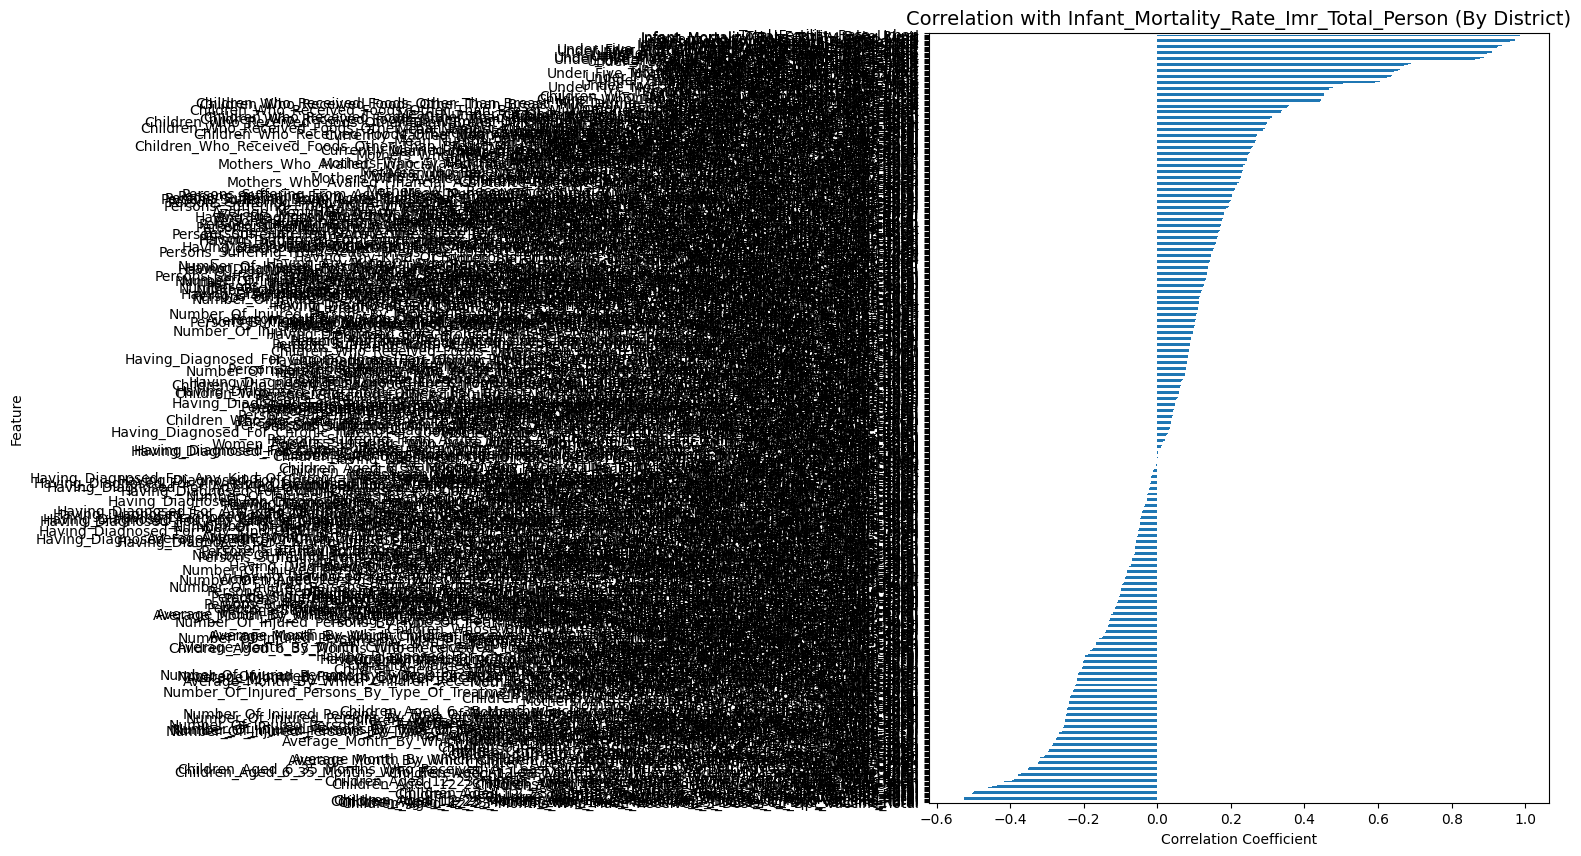

In [24]:
import matplotlib.pyplot as plt

# Get correlations with target
target = 'Infant_Mortality_Rate_Imr_Total_Person'
corr = (
    df.select_dtypes(include='number')
      .corr()[target]
      .drop(target)  # drop self-correlation
      .sort_values()
)

# Plot
plt.figure(figsize=(8, 10))
corr.plot(kind='barh')
plt.title(f'Correlation with {target} (By District)', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

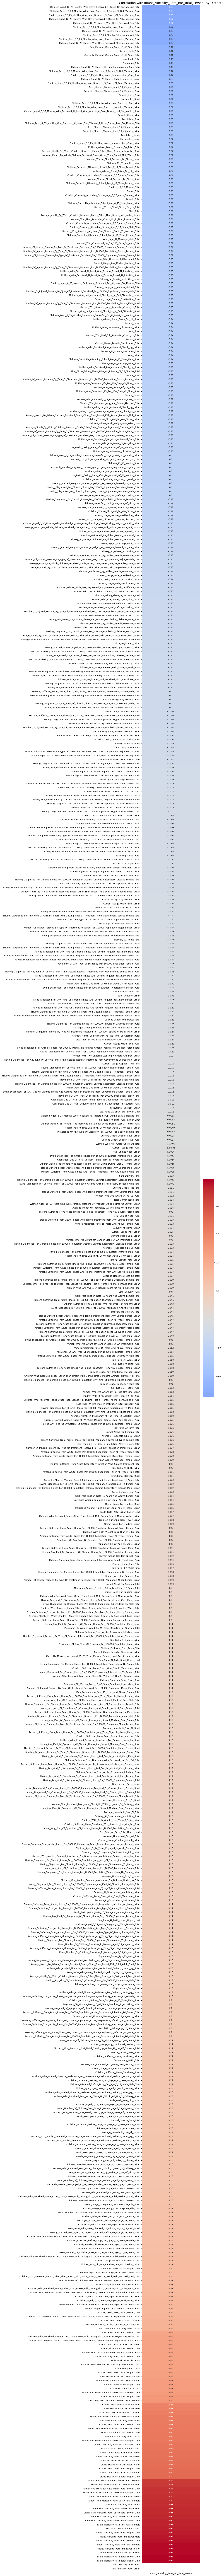

In [26]:
# Correlation to target variable by district
plt.figure(figsize=(6, len(corr)/3))
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlation with {target} (By District)', fontsize=14)
plt.show()